#Generate Association Rules

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data_df = pd.read_excel("/content/drive/MyDrive/DL_data/Project1_Data.xlsx")
data_df

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,14606550,99,3,2,3,3,0,1,1,0,37923,84.89,jcpenney.com,llbean.com,NaN,NaN,NaN
2182,14590791,99,2,3,7,7,1,1,1,0,43351,200.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2183,14917811,1,4,2,3,2,0,1,0,0,99338,161.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2184,14656919,99,4,2,11,7,0,1,1,0,94114,335.00,oldnavy.com,llbean.com,NaN,NaN,NaN


In [ ]:
data_df.dtypes

userid          int64
education       int64
region          int64
hhsz            int64
age             int64
income          int64
child           int64
race            int64
connection      int64
country         int64
zipcode         int64
money         float64
site1          object
site2          object
site3          object
site4          object
site5          object
dtype: object

In [ ]:
data_df['site1'] = data_df['site1'].astype('category')
data_df['site2'] = data_df['site2'].astype('category')
data_df['site3'] = data_df['site3'].astype('category')
data_df['site4'] = data_df['site4'].astype('category')
data_df['site5'] = data_df['site5'].astype('category')

data_df.dtypes


userid           int64
education        int64
region           int64
hhsz             int64
age              int64
income           int64
child            int64
race             int64
connection       int64
country          int64
zipcode          int64
money          float64
site1         category
site2         category
site3         category
site4         category
site5         category
dtype: object

In [ ]:
df=data_df[['userid','site1','site2','site3','site4','site5']]

df

,userid,site1,site2,site3,site4,site5
0,14840503,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
...,...,...,...,...,...,...
2181,14606550,jcpenney.com,llbean.com,NaN,NaN,NaN
2182,14590791,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2183,14917811,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2184,14656919,oldnavy.com,llbean.com,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

userid       0
site1        0
site2        0
site3     1625
site4     2025
site5     2146
dtype: int64

In [ ]:
df['site1'].value_counts()

victoriassecret.com    825
oldnavy.com            521
jcpenney.com           490
landsend.com           182
womanwithin.com         61
llbean.com              58
gap.com                 30
kohls.com               11
ae.com                   8
Name: site1, dtype: int64

In [ ]:
df['site2'].value_counts()

jcpenney.com       378
llbean.com         338
oldnavy.com        299
gap.com            240
ae.com             239
landsend.com       238
kohls.com          209
womanwithin.com    127
blair.com          118
Name: site2, dtype: int64

In [ ]:
df['site3'].value_counts()

llbean.com         118
gap.com            105
kohls.com           95
ae.com              66
jcpenney.com        55
landsend.com        50
blair.com           43
womanwithin.com     29
Name: site3, dtype: int64

In [ ]:
df['site4'].value_counts()

gap.com            44
kohls.com          35
ae.com             34
llbean.com         22
blair.com          15
landsend.com        9
womanwithin.com     2
Name: site4, dtype: int64

In [ ]:
df['site5'].value_counts()

kohls.com     18
ae.com        10
blair.com      5
gap.com        5
llbean.com     2
Name: site5, dtype: int64

In [ ]:
df['site3']

0                NaN
1                NaN
2          kohls.com
3                NaN
4       jcpenney.com
            ...     
2181             NaN
2182             NaN
2183             NaN
2184             NaN
2185    jcpenney.com
Name: site3, Length: 2186, dtype: category
Categories (8, object): ['ae.com', 'blair.com', 'gap.com', 'jcpenney.com', 'kohls.com',
                         'landsend.com', 'llbean.com', 'womanwithin.com']

In [ ]:
df['userid'].nunique()

2186

In [ ]:
#Number of Unique Website
store_record_1= []
lst=['site1','site2','site3','site4','site5']
for index, values in df.iterrows():
      for i in lst:
        if str(values[i])!='nan'and str(values[i]) not in store_record_1:
          store_record_1.append(str(values[i]))

In [ ]:
len(store_record_1)

10

In [ ]:
store_record = {}
lst=['site1','site2','site3','site4','site5']
for index, values in df.iterrows():
    userid = str(values.userid)
    if userid not in store_record:
        store_record[userid] = []
        for i in lst:
            if str(values[i])!='nan':
              store_record[userid].append(str(values[i]))
      
          

In [ ]:
 store_record

{'14840503': ['victoriassecret.com', 'llbean.com'],
 '12890751': ['landsend.com', 'gap.com'],
 '13129562': ['oldnavy.com', 'jcpenney.com', 'kohls.com'],
 '12910664': ['victoriassecret.com', 'ae.com'],
 '13601071': ['victoriassecret.com', 'oldnavy.com', 'jcpenney.com'],
 '15314597': ['jcpenney.com', 'landsend.com'],
 '15537454': ['landsend.com', 'llbean.com'],
 '13020319': ['jcpenney.com', 'womanwithin.com', 'kohls.com', 'blair.com'],
 '14586021': ['jcpenney.com', 'landsend.com'],
 '15653569': ['victoriassecret.com', 'gap.com'],
 '12103861': ['oldnavy.com', 'kohls.com'],
 '15318418': ['jcpenney.com', 'gap.com'],
 '15572150': ['jcpenney.com', 'womanwithin.com', 'llbean.com'],
 '13971801': ['jcpenney.com', 'llbean.com', 'kohls.com', 'blair.com'],
 '15480135': ['oldnavy.com', 'blair.com'],
 '14423054': ['victoriassecret.com', 'oldnavy.com'],
 '14705577': ['victoriassecret.com', 'jcpenney.com'],
 '14602489': ['jcpenney.com', 'llbean.com'],
 '11591425': ['landsend.com', 'gap.com'],
 '1552832

In [ ]:
item_database = []
for record in store_record.values():
    if len(record) > 1:
        item_database.append(record)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(item_database).transform(item_database)


In [ ]:
te.columns_

['ae.com',
 'blair.com',
 'gap.com',
 'jcpenney.com',
 'kohls.com',
 'landsend.com',
 'llbean.com',
 'oldnavy.com',
 'victoriassecret.com',
 'womanwithin.com']

In [ ]:
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False]])

In [ ]:
te_ary=te_ary.astype("int")
te_ary

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

##Association Rule

In [ ]:
import pandas as pd

data=pd.DataFrame(te_ary, columns=te.columns_)
data

,ae.com,blair.com,gap.com,jcpenney.com,kohls.com,landsend.com,llbean.com,oldnavy.com,victoriassecret.com,womanwithin.com
0,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2181,0,0,0,1,0,0,1,0,0,0
2182,0,0,0,1,0,0,0,0,1,0
2183,0,0,0,1,0,0,0,0,1,0
2184,0,0,0,0,0,0,1,1,0,0


###min_support=0.01 and confidence=0.25

In [ ]:
#min_support=0.01
itemsets = apriori(data, min_support=0.01, use_colnames=True)
itemsets

,support,itemsets
0,0.163312,(ae.com)
1,0.082800,(blair.com)
2,0.193962,(gap.com)
3,0.422232,(jcpenney.com)
4,0.168344,(kohls.com)
...,...,...
66,0.012809,"(victoriassecret.com, kohls.com, oldnavy.com)"
67,0.011436,"(llbean.com, landsend.com, oldnavy.com)"
68,0.012351,"(victoriassecret.com, llbean.com, landsend.com)"
69,0.011894,"(victoriassecret.com, landsend.com, oldnavy.com)"


In [ ]:
#confidence=0.25
rules = association_rules(itemsets, metric='confidence', min_threshold=0.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ae.com),(oldnavy.com),0.163312,0.375114,0.055810,0.341737,0.911020,-0.005451,0.949294
1,(ae.com),(victoriassecret.com),0.163312,0.377402,0.075938,0.464986,1.232072,0.014304,1.163705
2,(blair.com),(jcpenney.com),0.082800,0.422232,0.042086,0.508287,1.203809,0.007125,1.175011
3,(womanwithin.com),(blair.com),0.100183,0.082800,0.026532,0.264840,3.198567,0.018237,1.247620
4,(blair.com),(womanwithin.com),0.082800,0.100183,0.026532,0.320442,3.198567,0.018237,1.324121
5,(oldnavy.com),(gap.com),0.375114,0.193962,0.102013,0.271951,1.402088,0.029255,1.107121
6,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
7,(gap.com),(victoriassecret.com),0.193962,0.377402,0.071363,0.367925,0.974889,-0.001838,0.985006
8,(kohls.com),(jcpenney.com),0.168344,0.422232,0.077768,0.461957,1.094081,0.006687,1.073831
9,(landsend.com),(jcpenney.com),0.219122,0.422232,0.075480,0.344468,0.815825,-0.017040,0.881372


In [ ]:
rules.sort_values(by=['lift'], ascending=False).head(6)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

             antecedents        consequents   support  confidence      lift  \
3      (womanwithin.com)        (blair.com)  0.026532    0.264840  3.198567   
4            (blair.com)  (womanwithin.com)  0.026532    0.320442  3.198567   
18        (landsend.com)       (llbean.com)  0.091034    0.415449  1.688051   
17          (llbean.com)     (landsend.com)  0.091034    0.369888  1.688051   
28  (kohls.com, gap.com)      (oldnavy.com)  0.010064    0.536585  1.430458   
5          (oldnavy.com)          (gap.com)  0.102013    0.271951  1.402088   

    leverage  
3   0.018237  
4   0.018237  
18  0.037105  
17  0.037105  
28  0.003029  
5   0.029255  


###min_support=0.01 and confidence=0.3

In [ ]:
#confidence=0.3
rules = association_rules(itemsets, metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ae.com),(oldnavy.com),0.163312,0.375114,0.055810,0.341737,0.911020,-0.005451,0.949294
1,(ae.com),(victoriassecret.com),0.163312,0.377402,0.075938,0.464986,1.232072,0.014304,1.163705
2,(blair.com),(jcpenney.com),0.082800,0.422232,0.042086,0.508287,1.203809,0.007125,1.175011
3,(blair.com),(womanwithin.com),0.082800,0.100183,0.026532,0.320442,3.198567,0.018237,1.324121
4,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
5,(gap.com),(victoriassecret.com),0.193962,0.377402,0.071363,0.367925,0.974889,-0.001838,0.985006
6,(kohls.com),(jcpenney.com),0.168344,0.422232,0.077768,0.461957,1.094081,0.006687,1.073831
7,(landsend.com),(jcpenney.com),0.219122,0.422232,0.075480,0.344468,0.815825,-0.017040,0.881372
8,(llbean.com),(jcpenney.com),0.246112,0.422232,0.080055,0.325279,0.770379,-0.023861,0.856306
9,(oldnavy.com),(jcpenney.com),0.375114,0.422232,0.121683,0.324390,0.768274,-0.036702,0.855179


###min_support=0.01 and confidence=0.5

In [ ]:
#confidence=0.5
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(blair.com),(jcpenney.com),0.082800,0.422232,0.042086,0.508287,1.203809,0.007125,1.175011
1,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
2,(womanwithin.com),(jcpenney.com),0.100183,0.422232,0.050320,0.502283,1.189589,0.008020,1.160836
3,"(kohls.com, gap.com)",(oldnavy.com),0.018756,0.375114,0.010064,0.536585,1.430458,0.003029,1.348437


###min_support=0.1 and confidence=0.3

In [ ]:
#min_support=0.1
itemsets = apriori(data, min_support=0.1, use_colnames=True)
itemsets

#confidence=0.3
rules = association_rules(itemsets, metric='confidence', min_threshold=0.3)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
1,(oldnavy.com),(jcpenney.com),0.375114,0.422232,0.121683,0.324390,0.768274,-0.036702,0.855179
2,(victoriassecret.com),(oldnavy.com),0.377402,0.375114,0.136780,0.362424,0.966170,-0.004789,0.980096
3,(oldnavy.com),(victoriassecret.com),0.375114,0.377402,0.136780,0.364634,0.966170,-0.004789,0.979905


###min_support=0.05 and confidence=0.2

In [ ]:
#min_support=0.05
itemsets = apriori(data, min_support=0.05, use_colnames=True)
itemsets

#confidence=0.2
rules = association_rules(itemsets, metric='confidence', min_threshold=0.2)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ae.com),(oldnavy.com),0.163312,0.375114,0.055810,0.341737,0.911020,-0.005451,0.949294
1,(ae.com),(victoriassecret.com),0.163312,0.377402,0.075938,0.464986,1.232072,0.014304,1.163705
2,(victoriassecret.com),(ae.com),0.377402,0.163312,0.075938,0.201212,1.232072,0.014304,1.047447
3,(oldnavy.com),(gap.com),0.375114,0.193962,0.102013,0.271951,1.402088,0.029255,1.107121
4,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
5,(gap.com),(victoriassecret.com),0.193962,0.377402,0.071363,0.367925,0.974889,-0.001838,0.985006
6,(kohls.com),(jcpenney.com),0.168344,0.422232,0.077768,0.461957,1.094081,0.006687,1.073831
7,(landsend.com),(jcpenney.com),0.219122,0.422232,0.075480,0.344468,0.815825,-0.017040,0.881372
8,(llbean.com),(jcpenney.com),0.246112,0.422232,0.080055,0.325279,0.770379,-0.023861,0.856306
9,(jcpenney.com),(oldnavy.com),0.422232,0.375114,0.121683,0.288191,0.768274,-0.036702,0.877883


###min_support=0.02 and confidence=0.4

In [ ]:
#min_support=0.02
itemsets = apriori(data, min_support=0.02, use_colnames=True)
itemsets

#confidence=0.4
rules = association_rules(itemsets, metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ae.com),(victoriassecret.com),0.163312,0.377402,0.075938,0.464986,1.232072,0.014304,1.163705
1,(blair.com),(jcpenney.com),0.082800,0.422232,0.042086,0.508287,1.203809,0.007125,1.175011
2,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
3,(kohls.com),(jcpenney.com),0.168344,0.422232,0.077768,0.461957,1.094081,0.006687,1.073831
4,(womanwithin.com),(jcpenney.com),0.100183,0.422232,0.050320,0.502283,1.189589,0.008020,1.160836
5,(landsend.com),(llbean.com),0.219122,0.246112,0.091034,0.415449,1.688051,0.037105,1.289688
6,"(victoriassecret.com, gap.com)",(oldnavy.com),0.071363,0.375114,0.031565,0.442308,1.179128,0.004795,1.120485


#K-Means Clustering

In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
data_df = pd.read_excel("/content/drive/MyDrive/DL_data/Project1_Data.xlsx")
data_df

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,14606550,99,3,2,3,3,0,1,1,0,37923,84.89,jcpenney.com,llbean.com,NaN,NaN,NaN
2182,14590791,99,2,3,7,7,1,1,1,0,43351,200.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2183,14917811,1,4,2,3,2,0,1,0,0,99338,161.88,victoriassecret.com,jcpenney.com,NaN,NaN,NaN
2184,14656919,99,4,2,11,7,0,1,1,0,94114,335.00,oldnavy.com,llbean.com,NaN,NaN,NaN


In [ ]:
data_df.dtypes
data_df['userid']=data_df['userid'].astype(str)

In [ ]:
data_working=data_df

In [ ]:
data_df = data_df.drop(columns= ['site1','site2','site3','site4','site5'])
data_df.set_index('userid', inplace=True)
data_df = data_df.apply(lambda x: x.astype('float64'))
data_df

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,99.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,0.0,94954.0,657.93
12890751,4.0,2.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,46038.0,178.80
13129562,4.0,2.0,4.0,8.0,5.0,1.0,1.0,1.0,0.0,64504.0,483.44
12910664,99.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,0.0,31554.0,148.85
13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40
...,...,...,...,...,...,...,...,...,...,...,...
14606550,99.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,0.0,37923.0,84.89
14590791,99.0,2.0,3.0,7.0,7.0,1.0,1.0,1.0,0.0,43351.0,200.88
14917811,1.0,4.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,99338.0,161.88


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=data_df.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  14840503, 13971801, 14423054, 14705577, 13634033, 12053236, 14032241, 14947938, 12484409, 14607445, 15398157, 15490209, 14612158, 14553593, 15410726, 14814447, 11483061, 12742763, 14224159, 12831334, 12478626, 10333477, 14541953, 14787844, 15395926, 13169430, 12691373, 14679795, 12633515, 14423605, 10350610, 15469932, 14374663, 12501531, 13487491, 15619981, 13019196, 14235954, 13658856, 12568424, 13499074, 13769817, 15563518, 13636255, 14536475, 14564067, 14108431, 15102245, 14464131, 15007446, 10772529, 14549115, 12976621, 15424951, 13573892, 13962020, 15691688, 14860016, 11440212, 15292020, 14895930, 14982997, 13534681, 15386038, 12496551, 14198496, 15583573, 15475316, 12961753, 15061277, 14703363, 15387968, 14616493, 12906553, 13799270, 14371925, 13046328, 15107050, 15602340, 15109871, 12915767, 14355944, 14204933, 15239060, 14190636, 11438732, 14682984, 15244979, 13376320, 15588946, 14788695, 9862925, 13831768, 14005961, 14634366, 14990657, 11973506, 14615699, 14369354, 116158

In [ ]:
#Normalize the data
df_norm = data_df.apply(preprocessing.scale, axis=0)
df_norm

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,0.583954,1.639085,1.364171,-0.290355,-1.433249,0.600954,-0.149263,0.281968,-0.392646,1.834633,0.100491
12890751,-1.681754,-0.254199,-0.943343,0.353374,-0.381879,0.600954,-0.149263,0.281968,-0.392646,0.152595,-0.522412
13129562,-1.681754,-0.254199,0.594999,0.353374,0.143806,0.600954,-0.149263,0.281968,-0.392646,0.787572,-0.126359
12910664,0.583954,0.692443,0.594999,-0.934084,-1.433249,0.600954,-0.149263,0.281968,-0.392646,-0.345455,-0.561349
13601071,0.583954,0.692443,-0.174172,0.031509,-0.381879,-1.664021,-0.149263,0.281968,-0.392646,-0.053894,0.287011
...,...,...,...,...,...,...,...,...,...,...,...
14606550,0.583954,0.692443,-0.943343,-1.255949,-0.907564,-1.664021,-0.149263,0.281968,-0.392646,-0.126449,-0.644501
14590791,0.583954,-0.254199,-0.174172,0.031509,1.195176,0.600954,-0.149263,0.281968,-0.392646,0.060200,-0.493706
14917811,-1.753302,1.639085,-0.943343,-1.255949,-1.433249,-1.664021,-0.149263,-3.546497,-0.392646,1.985382,-0.544409


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  13601071, 15314597, 12103861, 15572150, 11591425, 15528325, 12053236, 14520987, 15367455, 13525346, 12716652, 15572906, 15041837, 13565878, 13047566, 14446369, 12751182, 13765193, 12494534, 13882928, 13774304, 15398157, 12053124, 14024128, 14553593, 11618334, 12742763, 10416962, 15403797, 10333477, 14601659, 12910347, 14679795, 14228472, 13623792, 15270306, 15628139, 14483483, 13705372, 13006582, 13422178, 15469932, 14374663, 15663847, 13019196, 15238868, 13658856, 12861898, 12568424, 14564603, 15519616, 15676460, 15088817, 13958851, 10700535, 14536475, 14621536, 14464131, 14269760, 12529387, 15026530, 12976621, 11444264, 13573892, 14902845, 13962020, 12750218, 10688935, 13066056, 15540105, 14625361, 13854215, 10264716, 11440212, 13622832, 12981699, 14198496, 13489254, 13175936, 14910231, 15061277, 15387968, 14616493, 14415103, 14915252, 15252899, 11486673, 13963579, 15630812, 15411928, 15207341, 14362078, 15511638, 14360771, 15537903, 13858875, 13819463, 13899620, 12479234, 12817

In [ ]:
data_df['Cluster']=memb
data_df

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,Cluster
userid,,,,,,,,,,,,
14840503,99.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,0.0,94954.0,657.93,1
12890751,4.0,2.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,46038.0,178.80,1
13129562,4.0,2.0,4.0,8.0,5.0,1.0,1.0,1.0,0.0,64504.0,483.44,1
12910664,99.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,0.0,31554.0,148.85,1
13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14606550,99.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,0.0,37923.0,84.89,0
14590791,99.0,2.0,3.0,7.0,7.0,1.0,1.0,1.0,0.0,43351.0,200.88,1
14917811,1.0,4.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,99338.0,161.88,2


   education  region   hhsz    age  income  child   race  connection  country  \
0      0.073  -0.040 -0.905 -0.078  -0.221 -1.664  0.087       0.282   -0.034   
1     -0.019   0.003  0.330  0.012   0.112  0.599 -0.025       0.282   -0.026   
2     -0.060   0.104 -0.126  0.137  -0.326 -0.159 -0.047      -3.546    0.356   

   zipcode  money  
0   -0.009 -0.074  
1   -0.001  0.044  
2    0.039 -0.165  


(-0.5, 7.5)

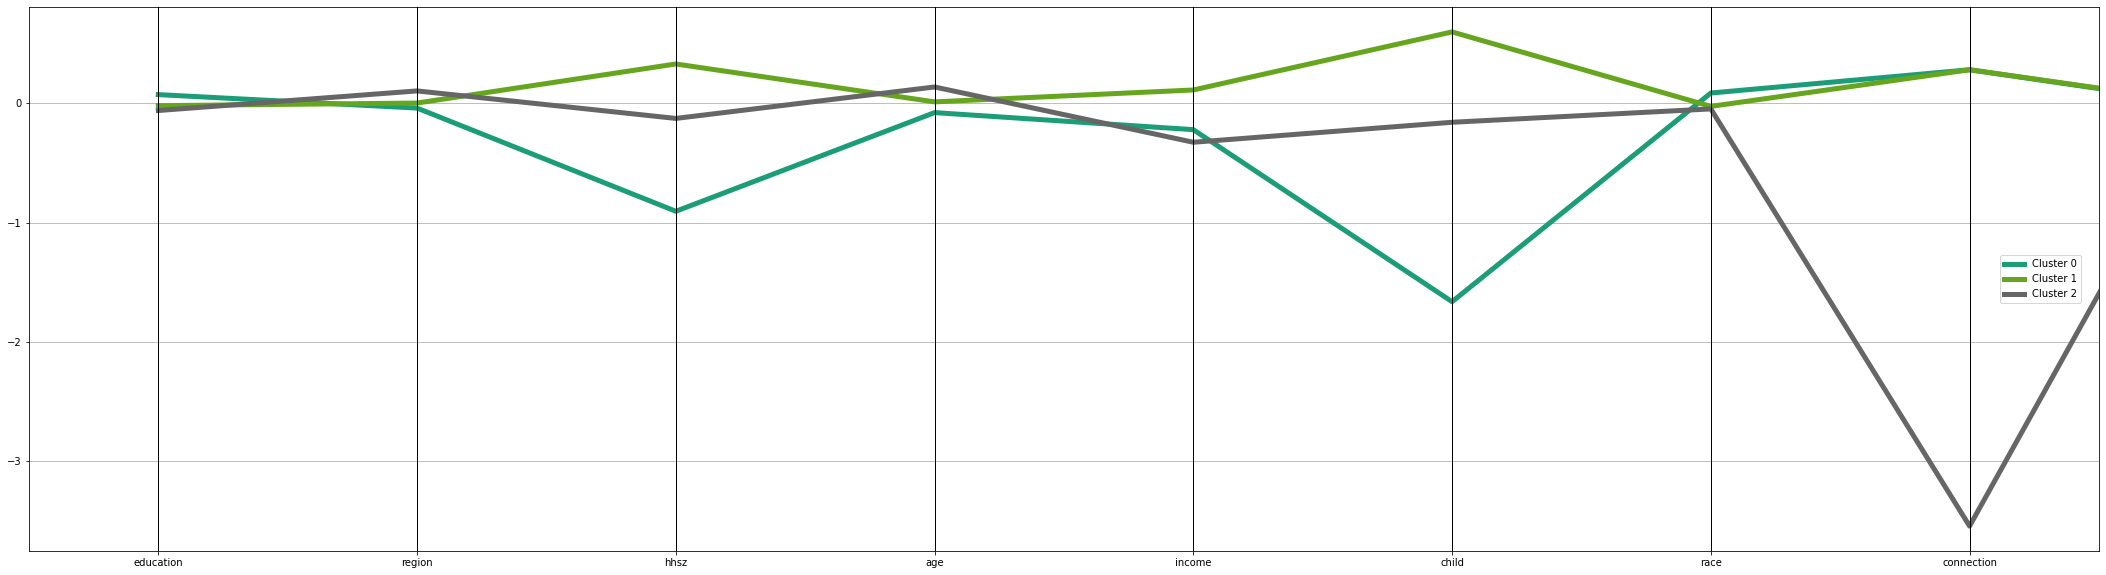

In [ ]:
#Center
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)


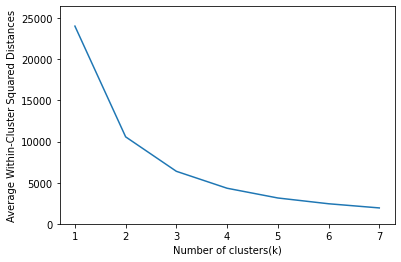

In [ ]:
#Elbow Rules
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()

Best: K=3 (Answer Question 3 in part II.Clustering)

# Link Association Rules with Clustering Analysis

##Part I to part II

 (kohls.com, gap.com) to (oldnavy.com): People buy Kohls and Gap also buy Oldnavy

####Find the user fall into the condition

In [ ]:
##Filter to get all the key in store_record dictionary
key=[]
for k in store_record.keys():
  key.append(k)
print(key)

['14840503', '12890751', '13129562', '12910664', '13601071', '15314597', '15537454', '13020319', '14586021', '15653569', '12103861', '15318418', '15572150', '13971801', '15480135', '14423054', '14705577', '14602489', '11591425', '15528325', '12930062', '13421681', '15420133', '13015024', '15484146', '13634033', '13043251', '14850945', '15330930', '14256375', '15531786', '12053236', '14520987', '11561629', '14894229', '15367455', '14018190', '13525346', '14598179', '12716652', '15676291', '15572906', '15041837', '14032241', '13713997', '15563586', '14413179', '10760612', '13565878', '14947938', '12484409', '13047566', '14264581', '15462314', '13601421', '15371832', '14446369', '15427838', '14574677', '12751182', '13765193', '15496226', '13963009', '14607445', '13999721', '12494534', '14540929', '13882928', '13774304', '15398157', '15476910', '12053124', '11687158', '13703187', '15377387', '15202147', '15490209', '14612158', '13646576', '15543712', '13369976', '14536358', '15396901', '13

In [ ]:
data_record= data[(data['gap.com']==1)&(data['kohls.com']==1)&(data['oldnavy.com']==1)]
data_record.reset_index(inplace=True)
data_record

,index,ae.com,blair.com,gap.com,jcpenney.com,kohls.com,landsend.com,llbean.com,oldnavy.com,victoriassecret.com,womanwithin.com
0,173,0,0,1,1,1,0,0,1,1,0
1,189,0,0,1,0,1,0,0,1,0,0
2,323,0,0,1,0,1,0,0,1,1,0
3,374,1,0,1,0,1,0,0,1,0,0
4,537,0,0,1,0,1,0,0,1,1,0
5,713,0,0,1,1,1,0,0,1,0,0
6,859,0,0,1,1,1,0,0,1,1,0
7,932,0,0,1,0,1,1,0,1,1,0
8,960,0,0,1,1,1,0,1,1,0,0
9,1007,0,0,1,0,1,0,0,1,0,0


In [ ]:
condit_record=data_record.index.values.tolist()
len(condit_record)
  

22

In [ ]:
#Get only the user_id that are in the condit_record
sort_record=[]
for i in condit_record:
  sort_record.append(key[i])
sort_record

['14840503',
 '12890751',
 '13129562',
 '12910664',
 '13601071',
 '15314597',
 '15537454',
 '13020319',
 '14586021',
 '15653569',
 '12103861',
 '15318418',
 '15572150',
 '13971801',
 '15480135',
 '14423054',
 '14705577',
 '14602489',
 '11591425',
 '15528325',
 '12930062',
 '13421681']

In [ ]:
data_working=data_working[data_working['userid'].isin(sort_record)]
data_working

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,site1,site2,site3,site4,site5
0,14840503,99,4,5,6,2,1,1,1,0,94954,657.93,victoriassecret.com,llbean.com,NaN,NaN,NaN
1,12890751,4,2,2,8,4,1,1,1,0,46038,178.80,landsend.com,gap.com,NaN,NaN,NaN
2,13129562,4,2,4,8,5,1,1,1,0,64504,483.44,oldnavy.com,jcpenney.com,kohls.com,NaN,NaN
3,12910664,99,3,4,4,2,1,1,1,0,31554,148.85,victoriassecret.com,ae.com,NaN,NaN,NaN
4,13601071,99,3,3,7,4,0,1,1,0,40033,801.40,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
5,15314597,99,1,1,7,5,0,2,1,0,19145,2213.33,jcpenney.com,landsend.com,NaN,NaN,NaN
6,15537454,99,3,2,9,7,1,1,1,0,26037,354.30,landsend.com,llbean.com,NaN,NaN,NaN
7,13020319,99,2,4,9,6,1,1,1,0,60143,542.21,jcpenney.com,womanwithin.com,kohls.com,blair.com,NaN
8,14586021,99,1,3,10,5,1,1,0,0,16130,393.76,jcpenney.com,landsend.com,NaN,NaN,NaN
9,15653569,99,2,4,4,7,1,1,1,0,60102,308.47,victoriassecret.com,gap.com,NaN,NaN,NaN


In [ ]:
data_working = data_working.drop(columns= ['site1','site2','site3','site4','site5'])
data_working.set_index('userid', inplace=True)
data_working = data_working.apply(lambda x: x.astype('float64'))
data_working

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,99.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,0.0,94954.0,657.93
12890751,4.0,2.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,46038.0,178.80
13129562,4.0,2.0,4.0,8.0,5.0,1.0,1.0,1.0,0.0,64504.0,483.44
12910664,99.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,0.0,31554.0,148.85
13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40
15314597,99.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,19145.0,2213.33
15537454,99.0,3.0,2.0,9.0,7.0,1.0,1.0,1.0,0.0,26037.0,354.30
13020319,99.0,2.0,4.0,9.0,6.0,1.0,1.0,1.0,0.0,60143.0,542.21
14586021,99.0,1.0,3.0,10.0,5.0,1.0,1.0,0.0,0.0,16130.0,393.76


####Run the Cluster

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_working)

# Cluster membership
memb1 = pd.Series(kmeans.labels_, index=data_working.index)


for key, item in memb1.groupby(memb1):
    print(key, ': ', ', '.join(item.index))

0 :  14840503, 13971801, 14423054, 14705577
1 :  12910664, 15314597, 15537454, 14586021, 12103861, 15318418, 15480135, 14602489, 11591425, 15528325, 13421681
2 :  12890751, 13129562, 13601071, 13020319, 15653569, 15572150, 12930062


In [ ]:
#Normalize the data
df_norm = data_working.apply(preprocessing.scale, axis=0)
df_norm

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money
userid,,,,,,,,,,,
14840503,0.612305,1.616150,1.384699,-0.511484,-1.895516,0.612372,-0.218218,0.397360,-0.218218,1.975202,0.037685
12890751,-1.613290,-0.415581,-0.791257,0.388728,-0.592349,0.612372,-0.218218,0.397360,-0.218218,0.073163,-0.841734
13129562,-1.613290,-0.415581,0.659380,0.388728,0.059235,0.612372,-0.218218,0.397360,-0.218218,0.791191,-0.282582
12910664,0.612305,0.600284,0.659380,-1.411695,-1.895516,0.612372,-0.218218,0.397360,-0.218218,-0.490029,-0.896706
13601071,0.612305,0.600284,-0.065938,-0.061378,-0.592349,-1.632993,-0.218218,0.397360,-0.218218,-0.160334,0.301017
15314597,0.612305,-1.431447,-1.516575,-0.061378,0.059235,-1.632993,4.582576,0.397360,-0.218218,-0.972538,2.892543
15537454,0.612305,0.600284,-0.791257,0.838834,1.362402,0.612372,-0.218218,0.397360,-0.218218,-0.704551,-0.519612
13020319,0.612305,-0.415581,0.659380,0.838834,0.710819,0.612372,-0.218218,0.397360,-0.218218,0.621619,-0.174713
14586021,0.612305,-1.431447,-0.065938,1.288939,0.059235,0.612372,-0.218218,-2.516611,-0.218218,-1.089773,-0.447186


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_norm)

# Cluster membership
memb1 = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb1.groupby(memb1):
    print(key, ': ', ', '.join(item.index))

0 :  12890751, 13601071, 15537454, 14586021, 12103861, 15480135, 14602489, 11591425, 13421681
1 :  14840503, 13129562, 12910664, 13020319, 15653569, 13971801, 14423054, 14705577, 12930062
2 :  15314597, 15318418, 15572150, 15528325


   education  region   hhsz    age  income  child   race  connection  country  \
0      0.110   0.036 -0.549  0.589  -0.086 -0.136 -0.218      -0.250    0.315   
1     -0.135   0.487  1.062 -0.161  -0.013  0.612 -0.218       0.074   -0.218   
2      0.056  -1.177 -1.154 -0.962   0.222 -1.072  0.982       0.397   -0.218   

   zipcode  money  
0   -0.529 -0.340  
1    0.908 -0.244  
2   -0.853  1.314  


(-0.5, 7.5)

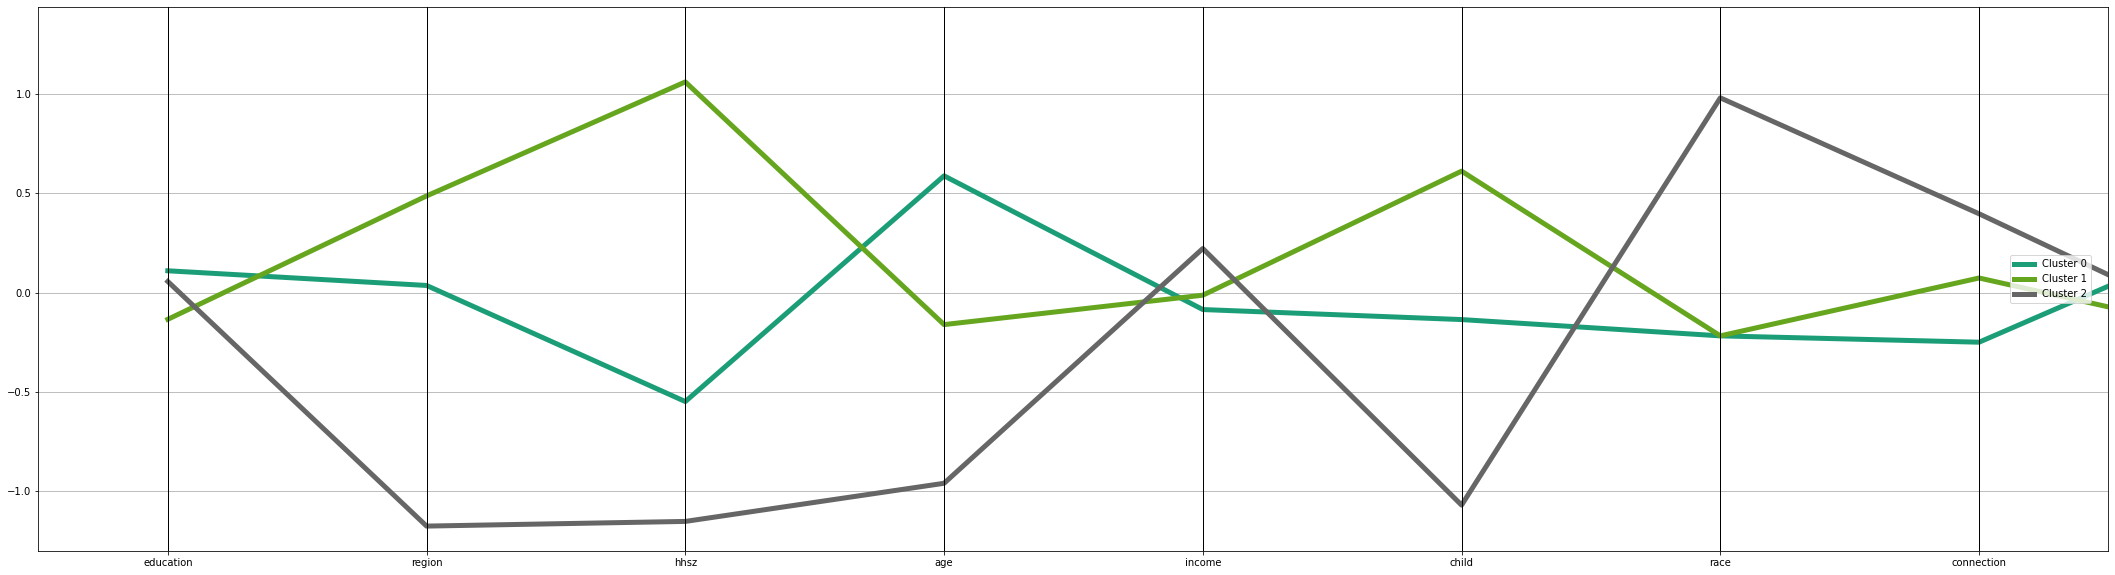

In [ ]:
#Center
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_norm.columns)
pd.set_option('precision', 3)
print(centroids)
pd.set_option('precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)


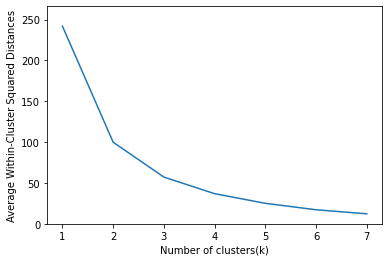

In [ ]:
#Elbow Rules
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 8), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()

####Compare the result from part 2

In [ ]:
data_working['Cluster']=memb
data_working

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,Cluster
userid,,,,,,,,,,,,
14840503,99.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,0.0,94954.0,657.93,1
12890751,4.0,2.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,46038.0,178.80,1
13129562,4.0,2.0,4.0,8.0,5.0,1.0,1.0,1.0,0.0,64504.0,483.44,1
12910664,99.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,0.0,31554.0,148.85,1
13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40,0
15314597,99.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,19145.0,2213.33,0
15537454,99.0,3.0,2.0,9.0,7.0,1.0,1.0,1.0,0.0,26037.0,354.30,1
13020319,99.0,2.0,4.0,9.0,6.0,1.0,1.0,1.0,0.0,60143.0,542.21,1
14586021,99.0,1.0,3.0,10.0,5.0,1.0,1.0,0.0,0.0,16130.0,393.76,2


In [ ]:
data_df[data_df.index.isin(sort_record)]

,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,Cluster
userid,,,,,,,,,,,,
14840503,99.0,4.0,5.0,6.0,2.0,1.0,1.0,1.0,0.0,94954.0,657.93,1
12890751,4.0,2.0,2.0,8.0,4.0,1.0,1.0,1.0,0.0,46038.0,178.80,1
13129562,4.0,2.0,4.0,8.0,5.0,1.0,1.0,1.0,0.0,64504.0,483.44,1
12910664,99.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,0.0,31554.0,148.85,1
13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40,0
15314597,99.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,19145.0,2213.33,0
15537454,99.0,3.0,2.0,9.0,7.0,1.0,1.0,1.0,0.0,26037.0,354.30,1
13020319,99.0,2.0,4.0,9.0,6.0,1.0,1.0,1.0,0.0,60143.0,542.21,1
14586021,99.0,1.0,3.0,10.0,5.0,1.0,1.0,0.0,0.0,16130.0,393.76,2


##Part II to part I

####Filtering the userid that was in cluster 0 (in part 2)

In [ ]:
data_assoc=data_df[data_df['Cluster']==0]
data_assoc=data_assoc.reset_index()
data_assoc

,userid,education,region,hhsz,age,income,child,race,connection,country,zipcode,money,Cluster
0,13601071,99.0,3.0,3.0,7.0,4.0,0.0,1.0,1.0,0.0,40033.0,801.40,0
1,15314597,99.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,19145.0,2213.33,0
2,12103861,99.0,3.0,2.0,10.0,5.0,0.0,1.0,1.0,1.0,32404.0,710.59,0
3,15572150,99.0,2.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,53574.0,504.05,0
4,11591425,99.0,3.0,2.0,9.0,4.0,0.0,1.0,1.0,0.0,30311.0,460.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,14226830,1.0,2.0,4.0,8.0,3.0,0.0,1.0,1.0,0.0,48015.0,234.82,0
521,14369262,99.0,3.0,2.0,9.0,2.0,0.0,1.0,1.0,0.0,74115.0,1008.69,0
522,14606550,99.0,3.0,2.0,3.0,3.0,0.0,1.0,1.0,0.0,37923.0,84.89,0
523,14656919,99.0,4.0,2.0,11.0,7.0,0.0,1.0,1.0,0.0,94114.0,335.00,0


In [ ]:
df_clus_0=df
df_clus_0['userid']=df_clus_0['userid'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
clus_0=data_assoc['userid'].values.tolist()
df_clus_0=df[df['userid'].isin(clus_0)]
df_clus_0=df_clus_0.reset_index()
df_clus_0=df_clus_0.drop(columns=['index'],axis=1)
df_clus_0

,userid,site1,site2,site3,site4,site5
0,13601071,victoriassecret.com,oldnavy.com,jcpenney.com,NaN,NaN
1,15314597,jcpenney.com,landsend.com,NaN,NaN,NaN
2,12103861,oldnavy.com,kohls.com,NaN,NaN,NaN
3,15572150,jcpenney.com,womanwithin.com,llbean.com,NaN,NaN
4,11591425,landsend.com,gap.com,NaN,NaN,NaN
...,...,...,...,...,...,...
520,14226830,victoriassecret.com,oldnavy.com,NaN,NaN,NaN
521,14369262,oldnavy.com,kohls.com,NaN,NaN,NaN
522,14606550,jcpenney.com,llbean.com,NaN,NaN,NaN
523,14656919,oldnavy.com,llbean.com,NaN,NaN,NaN


In [ ]:
clus_0_record = {}
lst=['site1','site2','site3','site4','site5']
for index, values in df_clus_0.iterrows():
    userid = str(values.userid)
    if userid not in clus_0_record:
        clus_0_record[userid] = []
        for i in lst:
            if str(values[i])!='nan':
              clus_0_record[userid].append(str(values[i]))

In [ ]:
len(clus_0_record)

525

In [ ]:
i_database = []
for record in clus_0_record.values():
    if len(record) > 1:
        i_database.append(record)

####Association Rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(i_database).transform(i_database)
te_ary=te_ary.astype("int")
te_ary

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
import pandas as pd

clus_0_data=pd.DataFrame(te_ary, columns=te.columns_)
clus_0_data

,ae.com,blair.com,gap.com,jcpenney.com,kohls.com,landsend.com,llbean.com,oldnavy.com,victoriassecret.com,womanwithin.com
0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,0,1,1,0
521,0,0,0,0,1,0,0,1,0,0
522,0,0,0,1,0,0,1,0,0,0
523,0,0,0,0,0,0,1,1,0,0


In [ ]:
#min_support=0.01
itemsets = apriori(data, min_support=0.01, use_colnames=True)
itemsets

,support,itemsets
0,0.163312,(ae.com)
1,0.082800,(blair.com)
2,0.193962,(gap.com)
3,0.422232,(jcpenney.com)
4,0.168344,(kohls.com)
...,...,...
66,0.012809,"(victoriassecret.com, kohls.com, oldnavy.com)"
67,0.011436,"(llbean.com, landsend.com, oldnavy.com)"
68,0.012351,"(victoriassecret.com, llbean.com, landsend.com)"
69,0.011894,"(victoriassecret.com, landsend.com, oldnavy.com)"


In [ ]:
#confidence=0.25
rules = association_rules(itemsets, metric='confidence', min_threshold=0.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ae.com),(oldnavy.com),0.163312,0.375114,0.055810,0.341737,0.911020,-0.005451,0.949294
1,(ae.com),(victoriassecret.com),0.163312,0.377402,0.075938,0.464986,1.232072,0.014304,1.163705
2,(blair.com),(jcpenney.com),0.082800,0.422232,0.042086,0.508287,1.203809,0.007125,1.175011
3,(womanwithin.com),(blair.com),0.100183,0.082800,0.026532,0.264840,3.198567,0.018237,1.247620
4,(blair.com),(womanwithin.com),0.082800,0.100183,0.026532,0.320442,3.198567,0.018237,1.324121
5,(oldnavy.com),(gap.com),0.375114,0.193962,0.102013,0.271951,1.402088,0.029255,1.107121
6,(gap.com),(oldnavy.com),0.193962,0.375114,0.102013,0.525943,1.402088,0.029255,1.318167
7,(gap.com),(victoriassecret.com),0.193962,0.377402,0.071363,0.367925,0.974889,-0.001838,0.985006
8,(kohls.com),(jcpenney.com),0.168344,0.422232,0.077768,0.461957,1.094081,0.006687,1.073831
9,(landsend.com),(jcpenney.com),0.219122,0.422232,0.075480,0.344468,0.815825,-0.017040,0.881372


In [ ]:
rules.sort_values(by=['lift'], ascending=False).head(6)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

             antecedents        consequents   support  confidence      lift  \
3      (womanwithin.com)        (blair.com)  0.026532    0.264840  3.198567   
4            (blair.com)  (womanwithin.com)  0.026532    0.320442  3.198567   
18        (landsend.com)       (llbean.com)  0.091034    0.415449  1.688051   
17          (llbean.com)     (landsend.com)  0.091034    0.369888  1.688051   
28  (kohls.com, gap.com)      (oldnavy.com)  0.010064    0.536585  1.430458   
5          (oldnavy.com)          (gap.com)  0.102013    0.271951  1.402088   

    leverage  
3   0.018237  
4   0.018237  
18  0.037105  
17  0.037105  
28  0.003029  
5   0.029255  
